In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os


In [7]:
lrtestimgpath = '/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_test'
lrtstimagelist = os.listdir(lrtestimgpath)
print(lrtstimagelist[0][:18])
print(lrtstimagelist[0][19:-4])


2019_05_09_PCMS002
000458_0000.


In [8]:
for lrimgnm in lrtstimagelist:
    scene = lrimgnm[:18]
    imgarrnm = lrimgnm[19:-4] + 'npy'
    srimg_path = '/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW_SR/'+scene+'/'+imgarrnm
    srimgarr = np.load(srimg_path)
#     plt.imshow(srimgarr)
    
    srnew = 1 - srimgarr/srimgarr.max()
    th=0.8
    srnew[srnew>th] = 1
    srnew[srnew<th] = 0
#     plt.imshow(srnew)
    
    width = srnew.shape[0]
    height = srnew.shape[1]
    srnn = np.zeros((height,width))

    for i in range(width):
        for j in range(height):
            pix = srnew[i][j][0]
            if pix == 1:
                srnn[i-np.min([5, i]):i+np.min([5, width-i]), j-np.min([25, j]):j+np.min([25, height-j])] = 1

#     plt.imshow(srnn)
    
    lrimg_path = '/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW/TRAIN_RAD_H/'+scene+'/RADAR_RA_H/'+imgarrnm
    lrimgarr = np.load(lrimg_path)
    lrimgarr2 = np.sqrt(np.square(lrimgarr[:,:,0])+np.square(lrimgarr[:,:,1]))
#     plt.imshow(lrimgarr2)
    
    combinedimg = np.multiply(lrimgarr2, srnn)
    combinedimg = 255*(combinedimg-combinedimg.min())/(combinedimg.max()-combinedimg.min())
    combinedimg = combinedimg.astype("uint8")
    combinedimgn = np.stack((combinedimg, combinedimg, combinedimg), axis = 2)
#     plt.imshow(combinedimg)
    
    img = Image.fromarray(combinedimgn)
    img = img.convert('RGB')
#     plt.imshow(img)

    img_name = os.path.join('/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2', scene +"_" +imgarrnm[:-3]+"jpeg")
    print(img_name)
    img.save(img_name)

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000458_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000615_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1002_000895_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PCMS005_000759_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000680_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS002_000167_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S016_000578_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000840_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1002_000473_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000591_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS002_000565_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_CMS1002_000217_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S015_000793_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM2S015_000266_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S017_000805_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS000_000639_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_001362_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_MLMS006_000729_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1001_000749_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS002_000153_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000605_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000681_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PCMS001_000655_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000281_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_CMS1002_000591_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S017_000604_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000698_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM2S015_000737_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1001_000268_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000879_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000460_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S013_000712_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PCMS001_000539_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_001556_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000316_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000077_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_CMS1002_000642_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PBMS004_000340_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_000548_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_001479_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_MLMS003_000514_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_001225_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_MLMS006_000025_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_MLMS003_000539_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_001619_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000097_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM2S015_000630_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000045_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM3S000_000468_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000341_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000428_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS002_000655_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000473_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000363_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_MLMS006_000170_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS2000_000400_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS2000_000854_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S015_000291_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS000_000678_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000724_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_BM1S008_000168_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000772_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000016_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PM2S004_000426_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_CM1S004_000139_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000624_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD005_001678_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD005_001385_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_000168_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_000292_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS002_000521_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1002_000060_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S017_000614_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD005_001659_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S014_000273_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S012_000513_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1001_000164_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_MLMS003_000175_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS2000_000658_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PBMS004_000395_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000197_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM2S015_000292_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000760_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_MLMS006_000144_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000329_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS000_000665_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS002_000239_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS000_000146_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S016_000676_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_000433_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS2000_000818_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S013_000704_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM3S000_000154_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000563_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS2000_000538_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_001405_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_CM1S004_000834_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S015_000130_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000279_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_000668_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD006_000157_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_001428_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000070_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1002_000528_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS001_000423_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/tmp/ipykernel_164628/1556717339.py:32: RuntimeWarning: invalid value encountered in true_divide
  combinedimg = 255*(combinedimg-combinedimg.min())/(combinedimg.max()-combinedimg.min())


/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S014_000358_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S015_000654_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000177_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S015_000459_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000782_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000648_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_001117_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_000880_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_CM1S004_000317_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000710_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS001_000198_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_BM1S008_000801_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000367_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_000419_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS001_000676_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000770_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000493_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_001571_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PM2S004_000252_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_001242_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000653_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000828_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM3S000_000247_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1002_000263_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD005_001280_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_MLMS006_000886_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS2000_000601_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PBMS004_000883_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_000149_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS002_000552_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S014_000105_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD005_001685_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000063_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000863_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_000151_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PBMS007_000068_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000212_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000090_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000879_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_001027_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000387_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000589_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_CMS1002_000090_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000127_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS002_000095_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PBMS007_000170_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1002_000526_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS002_000015_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000095_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000768_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S015_000263_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PCMS005_000708_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PCMS005_000300_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS002_000640_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000836_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S016_000516_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BCMS000_000863_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BCMS000_000618_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000355_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S014_000857_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000011_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000240_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S012_000208_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS000_000396_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_CMS1002_000498_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S016_000859_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS001_000012_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PBMS007_000404_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD006_001652_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_000841_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_001017_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PCMS001_000457_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PBMS004_000261_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BCMS000_000865_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S012_000889_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PBMS007_000606_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S012_000537_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS002_000623_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000115_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PCMS001_000716_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_MLMS006_000624_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS2000_000006_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S012_000867_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PM2S003_000139_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_CM1S004_000289_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_MLMS003_000457_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_CMS1002_000801_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS3000_000615_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_000530_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS000_000221_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000804_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S013_000172_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_001608_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS3000_000040_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_MLMS003_000694_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000233_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS002_000880_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS000_000808_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_MLMS006_000766_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S017_000525_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S014_000610_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS002_000493_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS3000_000456_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000211_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD006_000021_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PCMS001_000039_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS3000_000708_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_MLMS006_000259_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000858_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BCMS000_000653_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BCMS000_000512_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000696_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000848_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000040_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_CMS1002_000004_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000378_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S013_000653_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S017_000058_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S015_000414_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS002_000380_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000306_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000778_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PCMS005_000841_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S017_000735_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD005_000178_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS2000_000759_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PBMS004_000479_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_001162_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000098_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000243_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_MLMS006_000590_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PM2S004_000839_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S017_000659_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_CM1S004_000473_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000842_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PM2S003_000150_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000463_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PCMS001_000875_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS3000_000289_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS002_000183_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S012_000863_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000425_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS000_000473_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_CMS1002_000366_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_001331_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000066_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS002_000126_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_BM1S008_000606_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_BM1S008_000115_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000272_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS002_000503_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_000442_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_000411_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PCMS001_000569_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_CMS1002_000687_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S016_000196_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS2000_000108_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_CM1S004_000465_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000725_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S012_000168_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000133_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD005_001675_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD006_000144_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_CM1S004_000393_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S016_000513_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PM2S004_000324_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_BM1S008_000386_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S013_000173_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS001_000511_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS001_000767_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_001438_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS3000_000660_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_001574_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD005_001442_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM2S015_000505_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PBMS007_000631_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PCMS005_000651_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1001_000620_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000138_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S017_000313_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PM2S004_000879_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD005_001522_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000379_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1001_000274_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS002_000663_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000153_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000582_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_001367_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000637_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_000009_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PBMS004_000078_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_MLMS006_000821_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000612_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000694_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_000937_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_000938_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S014_000363_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_001267_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PM2S003_000276_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000673_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000489_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM2S015_000100_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_001000_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_CMS1002_000491_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000498_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM3S000_000504_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PCMS001_000545_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S017_000007_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PM2S003_000008_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000349_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S013_000830_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS3000_000106_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS000_000248_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_001525_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_CMS1002_000376_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM3S000_000390_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_001128_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_BM1S008_000840_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_CM1S004_000135_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000182_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PM2S004_000262_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_000625_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS3000_000320_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM3S000_000706_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S012_000164_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS001_000838_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000598_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000713_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BCMS000_000742_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_BM1S008_000849_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S015_000522_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PBMS007_000473_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PBMS007_000843_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000342_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000000_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_MLMS003_000043_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000457_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S016_000328_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM2S015_000862_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS3000_000401_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS002_000849_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000087_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000624_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000769_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS3000_000571_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S017_000523_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS2000_000576_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S012_000635_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_BM1S008_000439_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_000461_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS000_000714_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PBMS004_000385_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_BM1S008_000761_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PBMS007_000290_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS2000_000824_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_PM2S015_000614_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_BM1S008_000008_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000635_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_CM1S004_000375_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_MLMS003_000841_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1002_000828_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000586_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS002_000105_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BCMS000_000093_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PM2S004_000701_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000382_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000377_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS002_000281_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_000711_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD002_000224_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000269_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PM2S004_000604_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD001_001686_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S012_000750_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_MLMS003_000715_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000359_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S012_000887_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000053_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S013_000860_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PCMS001_000808_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1000_000502_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_001039_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000656_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BCMS000_000079_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PCMS001_000103_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S013_000772_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S017_000004_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_29_BM1S017_000694_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS3000_000163_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_MLMS003_000595_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S012_000823_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1001_000680_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS1001_000490_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_PBMS003_000494_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_MLMS003_000182_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD013_000391_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_CM1S004_000654_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_30_MLMS001_000815_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM1S013_000232_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD005_001624_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_09_29_ONRD011_000230_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000050_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_BMS1000_000643_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PBMS004_000693_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_04_09_PMS3000_000783_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000813_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_23_PM2S011_000077_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2/2019_05_09_PCMS002_000623_0000.jpeg
/home/vr-lab/Asish/8th Sem Radar Project/Object Detecti

In [9]:
lrtestimgpath = '/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_train'
lrtstimagelist = os.listdir(lrtestimgpath)
print(lrtstimagelist[0][:18])
print(lrtstimagelist[0][19:-4])


for lrimgnm in lrtstimagelist:
    scene = lrimgnm[:18]
    imgarrnm = lrimgnm[19:-4] + 'npy'
    srimg_path = '/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW_SR/'+scene+'/'+imgarrnm
    srimgarr = np.load(srimg_path)
#     plt.imshow(srimgarr)
    
    srnew = 1 - srimgarr/srimgarr.max()
    th=0.8
    srnew[srnew>th] = 1
    srnew[srnew<th] = 0
#     plt.imshow(srnew)
    
    width = srnew.shape[0]
    height = srnew.shape[1]
    srnn = np.zeros((height,width))

    for i in range(width):
        for j in range(height):
            pix = srnew[i][j][0]
            if pix == 1:
                srnn[i-np.min([5, i]):i+np.min([5, width-i]), j-np.min([25, j]):j+np.min([25, height-j])] = 1

#     plt.imshow(srnn)
    
    lrimg_path = '/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW/TRAIN_RAD_H/'+scene+'/RADAR_RA_H/'+imgarrnm
    lrimgarr = np.load(lrimg_path)
    lrimgarr2 = np.sqrt(np.square(lrimgarr[:,:,0])+np.square(lrimgarr[:,:,1]))
#     plt.imshow(lrimgarr2)
    
    combinedimg = np.multiply(lrimgarr2, srnn)
    combinedimg = 255*(combinedimg-combinedimg.min())/(combinedimg.max()-combinedimg.min())
    print(combinedimg.min())
    print(combinedimg.max())
    combinedimg = combinedimg.astype("uint8")
    combinedimgn = np.stack((combinedimg, combinedimg, combinedimg), axis = 2)
#     plt.imshow(combinedimg)
    
    img = Image.fromarray(combinedimgn)
    img = img.convert('RGB')
#     plt.imshow(img)

    img_name = os.path.join('/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2', scene +"_" +imgarrnm[:-3]+"jpeg")
#     print(img_name)
    img.save(img_name)

2019_04_09_PMS1001
000801_0000.
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.

0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


/tmp/ipykernel_164628/1055646785.py:38: RuntimeWarning: invalid value encountered in true_divide
  combinedimg = 255*(combinedimg-combinedimg.min())/(combinedimg.max()-combinedimg.min())


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
nan
nan
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.

0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
nan
nan
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.

In [10]:
lrtestimgpath = '/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_val'
lrtstimagelist = os.listdir(lrtestimgpath)
print(lrtstimagelist[0][:18])
print(lrtstimagelist[0][19:-4])


for lrimgnm in lrtstimagelist:
    scene = lrimgnm[:18]
    imgarrnm = lrimgnm[19:-4] + 'npy'
    srimg_path = '/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW_SR/'+scene+'/'+imgarrnm
    srimgarr = np.load(srimg_path)
#     plt.imshow(srimgarr)
    
    srnew = 1 - srimgarr/srimgarr.max()
    th=0.8
    srnew[srnew>th] = 1
    srnew[srnew<th] = 0
#     plt.imshow(srnew)
    
    width = srnew.shape[0]
    height = srnew.shape[1]
    srnn = np.zeros((height,width))

    for i in range(width):
        for j in range(height):
            pix = srnew[i][j][0]
            if pix == 1:
                srnn[i-np.min([5, i]):i+np.min([5, width-i]), j-np.min([25, j]):j+np.min([25, height-j])] = 1

#     plt.imshow(srnn)
    
    lrimg_path = '/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW/TRAIN_RAD_H/'+scene+'/RADAR_RA_H/'+imgarrnm
    lrimgarr = np.load(lrimg_path)
    lrimgarr2 = np.sqrt(np.square(lrimgarr[:,:,0])+np.square(lrimgarr[:,:,1]))
#     plt.imshow(lrimgarr2)
    
    combinedimg = np.multiply(lrimgarr2, srnn)
    combinedimg = 255*(combinedimg-combinedimg.min())/(combinedimg.max()-combinedimg.min())
    combinedimg = combinedimg.astype("uint8")
    combinedimgn = np.stack((combinedimg, combinedimg, combinedimg), axis = 2)
#     plt.imshow(combinedimg)
    
    img = Image.fromarray(combinedimgn)
    img = img.convert('RGB')
#     plt.imshow(img)

    img_name = os.path.join('/home/vr-lab/Asish/8th Sem Radar Project/Object Detection/ssd-tf2-master/dataset/VOC2007/JPEG_SR_2', scene +"_" +imgarrnm[:-3]+"jpeg")
#     print(img_name)
    img.save(img_name)

2019_05_29_BM1S016
000527_0000.


/tmp/ipykernel_164628/1250303592.py:38: RuntimeWarning: invalid value encountered in true_divide
  combinedimg = 255*(combinedimg-combinedimg.min())/(combinedimg.max()-combinedimg.min())


From here on, it is rubbish.. Just to get the code perfectly

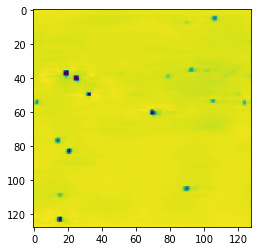

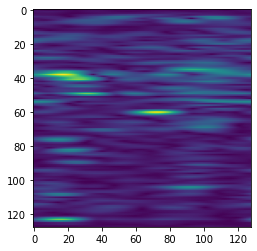

In [45]:
a = np.load('/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW/TRAIN_RAD_H/2019_04_30_MLMS001/RADAR_RA_H/000500_0000.npy')
plt.imshow(np.sqrt(np.square(a[:,:,0])+np.square(a[:,:,1])))

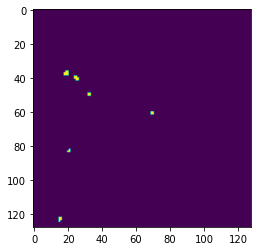

In [10]:
srnew = 1 - srimgarr/srimgarr.max()
th=0.95
srnew[srnew>th] = 1
srnew[srnew<th] = 0
plt.imshow(srnew)

# for i in range(srnew.shape[0]):
#     for j in range(srnew.shape[1]):
#         k = srnew[i][j][0]
#         if k not in [0,1]:
#             print(k)

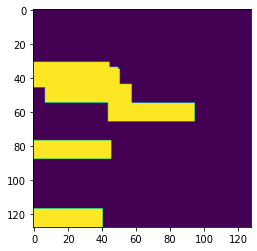

In [11]:
width = srnew.shape[0]
height = srnew.shape[1]
srnn = np.zeros((height,width))

for i in range(width):
    for j in range(height):
        pix = srnew[i][j][0]
        if pix == 1:
            srnn[i-np.min([5, i]):i+np.min([5, width-i]), j-np.min([25, j]):j+np.min([25, height-j])] = 1

plt.imshow(srnn)

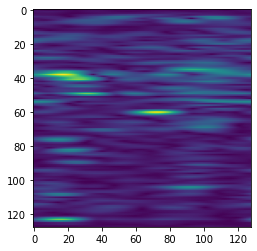

In [14]:
lrimg_path = '/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW/TRAIN_RAD_H/2019_04_30_MLMS001/RADAR_RA_H/000500_0000.npy'
lrimgarr = np.load(lrimg_path)
lrimgarr2 = np.sqrt(np.square(lrimgarr[:,:,0])+np.square(lrimgarr[:,:,1]))
plt.imshow(lrimgarr2)

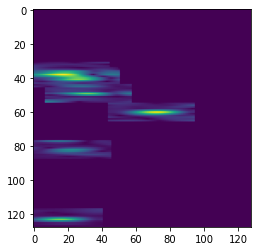

In [16]:
combinedimg = np.multiply(lrimgarr2, srnn)
plt.imshow(combinedimg)